<font family="Lato" size=6 color=#333>Principle Component Analysis (PCA)</font><br>
<font family="Lato" size=4 color=#333>Wine dataset</font>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Read Wine dataset, drop label column
df = pd.read_csv("Wine.csv")
df.drop(["Customer_Segment"], axis=1, inplace=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Normalize dataset (X=unnormalized, X_norm=normalized)
X = df.values
sc = StandardScaler()
X_norm = sc.fit_transform(X)

<font face="Lato" size=5 color=orange>PCA with Unnormalized data</font>

In [ ]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#EigenVector
df_component = pd.DataFrame(pca.components_)
df_component.columns = df.columns
df_component = df_component.T
df_component.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
df_component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.001659,0.001203,-0.016874,-0.141447,0.020337,0.194120,-0.923280,-0.284821,-0.086601,-0.002245,-0.014972,-0.015651,0.008029
Malic_Acid,-0.000681,0.002155,-0.122003,-0.160390,-0.612883,0.742473,0.150110,0.064674,-0.015662,-0.018509,-0.023188,0.067296,-0.011090
Ash,0.000195,0.004594,-0.051987,0.009773,0.020176,0.041753,-0.045010,0.149340,-0.073650,-0.086800,0.954011,-0.132063,-0.173686
Ash_Alcanity,-0.004671,0.026450,-0.938593,0.330965,0.064352,-0.024065,-0.031527,-0.015154,-0.002045,0.003554,-0.052822,0.005394,0.001940
Magnesium,0.017868,0.999344,0.029780,0.005394,-0.006149,-0.001924,-0.001797,0.003552,0.001964,-0.000041,-0.003025,0.000621,0.002285
Total_Phenols,0.000990,0.000878,0.040485,0.074585,0.315245,0.278717,0.020186,0.177238,-0.255673,0.847195,0.008802,0.003883,-0.026691
Flavanoids,0.001567,-0.000052,0.085443,0.169087,0.524761,0.433598,0.038869,0.248117,-0.378307,-0.520138,-0.133205,-0.037488,0.069599
Nonflavanoid_Phenols,-0.000123,-0.001354,-0.013511,-0.010806,-0.029648,-0.021953,0.004665,-0.006498,-0.036752,0.037713,0.199179,0.147552,0.966466
Proanthocyanins,0.000601,0.005004,0.024659,0.050121,0.251183,0.241884,0.309799,-0.870433,0.051520,0.009723,0.135621,-0.013119,-0.017604
Color_Intensity,0.002327,0.015100,-0.291398,-0.878894,0.331747,0.002740,0.112837,0.081287,0.099029,-0.023147,-0.009820,0.050356,-0.004633


In [ ]:
#Variance ratio
df_var = pd.DataFrame(pca.explained_variance_ratio_*100)
df_var.columns = ['Variance']
df_var = df_var.T
df_var.columns = df_var.columns+1
df_var

,1,2,3,4,5,6,7,8,9,10,11,12,13
Variance,99.809123,0.173592,0.009496,0.005022,0.001236,0.000846,0.000281,0.000152,0.000113,0.000072,0.000038,0.000021,0.000008


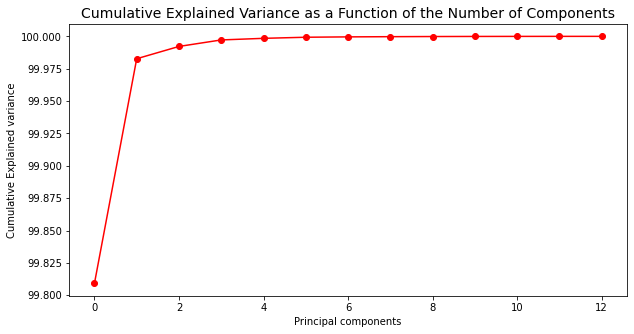

In [ ]:
#Plot cummulative variance
plt.figure(figsize=(10, 5))
plt.title('Cumulative Explained Variance as a Function of the Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
cum_var = np.cumsum(df_var.values)
plt.plot(cum_var, color='r', marker='o')
plt.show()

<font face="Lato" size=5 color=orange>PCA with Normalized data</font>

In [ ]:
pca = PCA()
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#EigenVector
df_component = pd.DataFrame(pca.components_)
df_component.columns = df.columns
df_component = df_component.T
df_component.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
df_component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
Malic_Acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
Ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
Ash_Alcalinity,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
Magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
Total_Phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
Flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
Nonflavanoid_Phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
Proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
Color_Intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


In [ ]:
#Variance Ratio
df_var = pd.DataFrame(pca.explained_variance_ratio_*100)
df_var.columns = ['Variance']
df_var = df_var.T
df_var.columns = df_var.columns+1
df_var

,1,2,3,4,5,6,7,8,9,10,11,12,13
Variance,36.198848,19.20749,11.123631,7.06903,6.563294,4.935823,4.238679,2.680749,2.222153,1.930019,1.736836,1.298233,0.795215


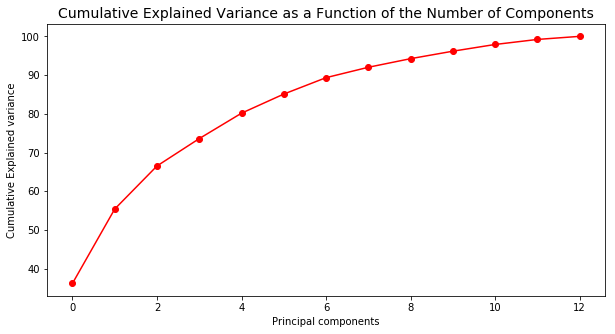

In [ ]:
#Plot cummulative variance
plt.figure(figsize=(10, 5))
plt.title('Cumulative Explained Variance as a Function of the Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
cum_var = np.cumsum(df_var.values)
plt.plot(cum_var, color='r', marker='o')
plt.show()